# **Exploratory Data Analysis**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp

In [2]:
import warnings
warnings.filterwarnings("ignore")

Since we were provided with 2 datasets, with train and test datasets, so we are importing both the datasets together in 1 cell


In [3]:
fraud_train=pd.read_csv("E:\JPMC GEMSTONES/fraudTrain.csv")
fraud_test=pd.read_csv("E:\JPMC GEMSTONES/fraudTest.csv")
df = pd.concat([fraud_train,fraud_test], ignore_index = True)

In [4]:
df.shape            #checking Dimensions of our data

(1852394, 23)

In [5]:

df.columns          #Listing of all the attributes of the dataset

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.info()           #Datatypes of all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [7]:
df.describe().T     #Statistical measures of each attribute 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)  

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum() 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
df.duplicated().any()   #Finding any duplicate values

False

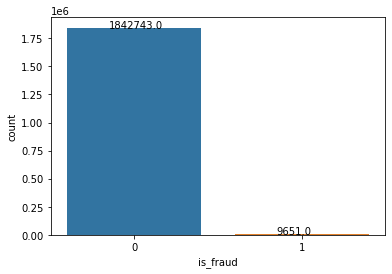

In [13]:
f=sns.countplot(df['is_fraud'])
for p in f.patches:
   f.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [14]:
fraud=df[df['is_fraud']==1]
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9.651000e+03,9651.000000,9651.000000,9651.000000,9651.000000,9.651000e+03,9.651000e+03,9651.000000,9651.000000,9651.0
mean,3.970393e+17,530.661412,47999.638379,38.742813,-90.033730,8.999842e+04,1.355323e+09,38.734962,-90.037919,1.0
std,1.276696e+18,391.028873,27140.975802,5.153060,14.250246,3.062833e+05,1.793362e+07,5.192904,14.268910,0.0
min,6.041621e+10,1.060000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.161782,-166.550779,1.0
25%,1.800174e+14,240.075000,24433.000000,35.042850,-96.727000,7.950000e+02,1.339520e+09,35.087441,-96.678370,1.0
50%,3.521261e+15,390.000000,46946.000000,39.537000,-87.043600,2.693000e+03,1.355276e+09,39.516424,-87.167538,1.0
75%,4.603179e+15,902.365000,70447.000000,42.076500,-79.940300,1.905400e+04,1.370567e+09,42.043486,-79.907350,1.0
max,4.992346e+18,1376.040000,99921.000000,66.693300,-67.950300,2.906700e+06,1.387754e+09,67.510267,-66.960745,1.0


<AxesSubplot:>

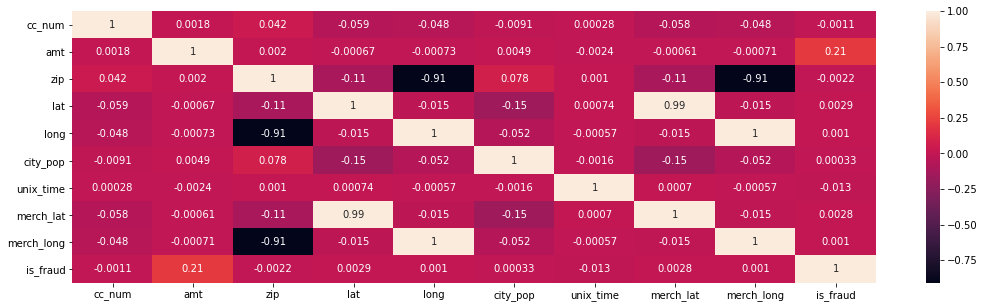

In [15]:
plt.figure(figsize=(18,5))    
sns.heatmap(df.corr(),annot = True)


**Uni-Variate Analysis**

In [16]:
pd.crosstab(df['gender'],df['is_fraud'])  #Comapring fraudulent transactions of male and feamle

is_fraud,0,1
gender,,
F,1009850,4899
M,832893,4752


<AxesSubplot:xlabel='gender', ylabel='count'>

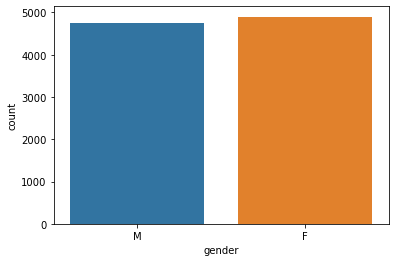

In [17]:

sns.countplot(x='gender',data=df[df['is_fraud']==1])

Females are more prone to fraud

In [18]:
#Calculating age from Date of Birth
df['age'] = pd.DatetimeIndex(df["trans_date_trans_time"]).year-pd.DatetimeIndex(df["dob"]).year

In [19]:
#Dividing age into multiple categories(Age Groups)                   
def age_group(row):      
  
  
  rows = row["age"]
  if rows <20:
     return "less than 20"
  elif rows >=20 and rows<30:
    return "20 to 30"
  elif rows >=30 and rows<40:
     return "30 to 40"
  elif rows >=40 and rows<50:
     return "40 to 50"
  elif rows >=50 and rows<60:
     return "50 to 60"
  elif rows >=60 and rows<70:
     return "60 to 70"
  elif rows >=70 and rows<80:
     return "70 to 80"
  elif rows >=80 and rows<90:
     return "80 to 90"
  else:
     return "greater than 90"
df["age_group"] = df.apply(age_group,axis=1)


<AxesSubplot:xlabel='age_group', ylabel='count'>

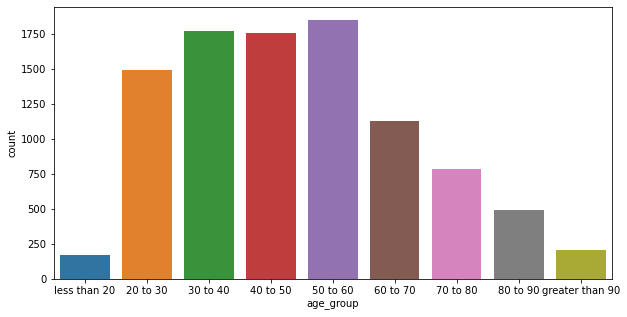

In [20]:
plt.figure(figsize=(10,5))       
order1 = ["less than 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80","80 to 90","greater than 90"]
sns.countplot(x="age_group",data=df[df["is_fraud"]==1], order = order1)

People between the agegroups of 20-60 are more victicms of fraud

In [21]:
df.groupby(["is_fraud"])['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,67.651278,153.548108,1.00,9.610,47.24,82.560,28948.90
1,9651.0,530.661412,391.028873,1.06,240.075,390.00,902.365,1376.04


<AxesSubplot:xlabel='amt'>

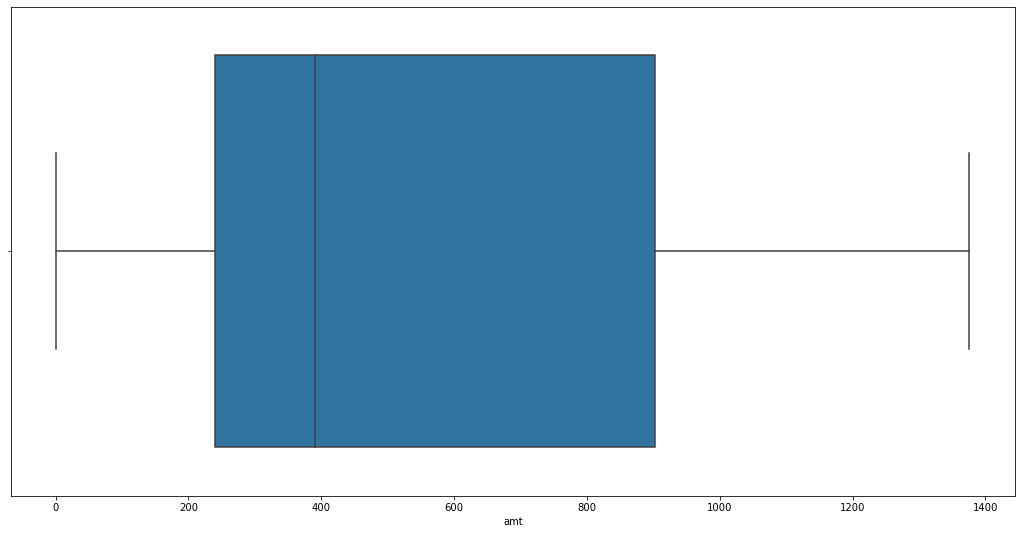

In [22]:
plt.figure(figsize=(18,9))       
sns.boxplot(x="amt",data = df[df['is_fraud']==1])

fraudulent trans are more when the amount is more than $400

In [24]:
df['limit'] = df.groupby(['cc_num'])['amt'].transform(sum)/24     #Monthly spending limit for each card

In [25]:
df['limit']

0          10904.141250
1          10192.197083
2           2141.430833
3           2479.454167
4          11607.784583
               ...     
1852389     5702.241250
1852390     7696.076250
1852391    13494.141250
1852392     7423.971250
1852393     9391.851250
Name: limit, Length: 1852394, dtype: float64

In [26]:
df['limit'].value_counts()

10335.681667    4392
14007.261667    4392
8749.420000     4386
15992.391667    4386
10804.984583    4386
                ... 
255.064167         7
103.927083         7
236.331250         7
133.488750         7
178.020000         6
Name: limit, Length: 998, dtype: int64

In [27]:
df["cc_num"].value_counts()

6538441737335434    4392
30270432095985      4392
6538891242532018    4386
4364010865167176    4386
4642255475285942    4386
                    ... 
4225628813173670       7
340187018810220        7
6011732631674654       7
4734310647841293       7
4295296907373          6
Name: cc_num, Length: 999, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
 22  age               

In [29]:
df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,limit
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125,-0.000131,-0.006475
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308,-0.010695,0.031377
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190,0.010359,0.053979
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904,0.047143,-0.035843
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022,-0.029437,-0.027976
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325,-0.090889,0.052586
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329,0.020680,0.001598
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778,0.046768,-0.035608
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999,-0.029392,-0.027969
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000,0.010927,-0.044430


In [30]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,limit
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.621138e+01,7.517911e+03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,1.739545e+01,3.508104e+03
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.400000e+01,5.618875e+01
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,3.300000e+01,5.245820e+03
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,4.400000e+01,7.230608e+03
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.700000e+01,9.133270e+03
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.600000e+01,1.715292e+04


In [31]:

pd.crosstab(df["is_fraud"],df["state"]) #State wise division of legit and fraudulent transactions


state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,2913,58243,44416,15298,80093,19651,10923,5099,0,60441,...,17482,24754,134677,15296,41483,16740,26914,41510,36383,27657
1,50,278,195,64,402,115,56,31,9,334,...,92,159,592,61,273,72,126,228,146,119


<AxesSubplot:xlabel='state', ylabel='count'>

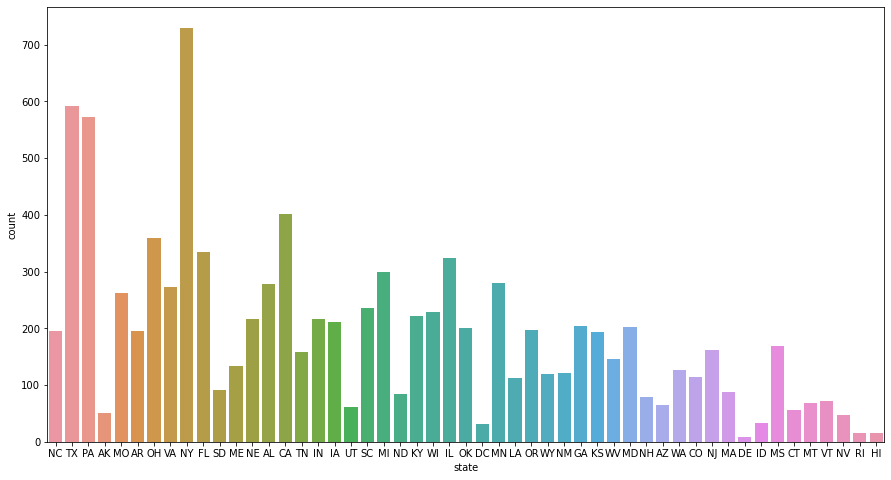

In [32]:

plt.figure(figsize=(15,8))
sns.countplot(x='state',data=df[df['is_fraud']==1])

State:More fradulent transactions occured in NewYork,Texas,Pennsylvania

In [33]:
df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year.astype(int).astype(str)
df["hour"] = pd.DatetimeIndex(df["trans_date_trans_time"]).hour
df["month"] = pd.DatetimeIndex(df["trans_date_trans_time"]).month
d = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'}
df.month = df.month.map(d)
df['dayofweek'] = pd.DatetimeIndex(df["trans_date_trans_time"]).dayofweek+1
d1 = {1:'MON',2:'TUE',3:'WED',4:'THU', 5:'FRI',6:'SAT',7:'SUN'}
df.dayofweek = df.dayofweek.map(d1)
df["day"] = pd.DatetimeIndex(df["trans_date_trans_time"]).day


In [34]:
df.groupby(["cc_num","month"])['amt'].sum().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of cc_num               month
60416207185          APR       9596.67
                     AUG      11836.93
                     DEC      19043.33
                     FEB       4502.72
                     JAN       7473.22
                                ...   
4992346398065154184  MAR      16731.78
                     MAY      20987.00
                     NOV      17209.44
                     OCT      17337.40
                     SEP      13637.94
Name: amt, Length: 10992, dtype: float64>

In [35]:
pd.crosstab(df["year"],df["is_fraud"])

is_fraud,0,1
year,,
2019,919630,5220
2020,923113,4431


<AxesSubplot:xlabel='year', ylabel='count'>

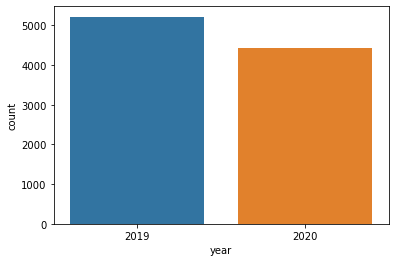

In [36]:
sns.countplot(x="year",data=df[df["is_fraud"]==1])

Fraudulent Transactions are more in 2019

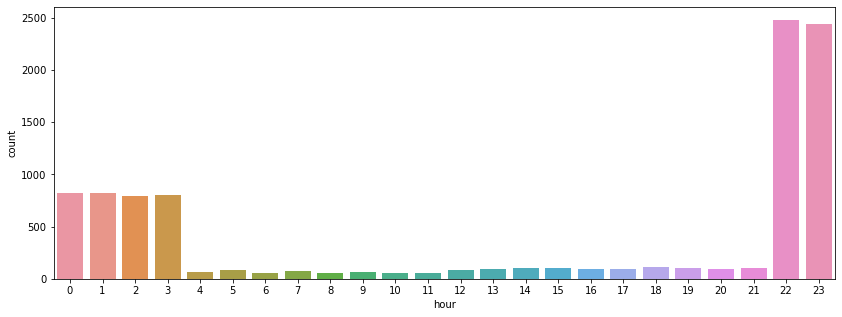

In [37]:
plt.figure(figsize=(14,5))
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["hour"])
plt.show()

fraudulent transcations are more during latenights

In [38]:
pd.crosstab(df["dayofweek"],df["is_fraud"])

is_fraud,0,1
dayofweek,,
FRI,213702,1376
MON,367934,1484
SAT,261734,1493
SUN,342087,1590
THU,205424,1317
TUE,269074,1266
WED,182788,1125


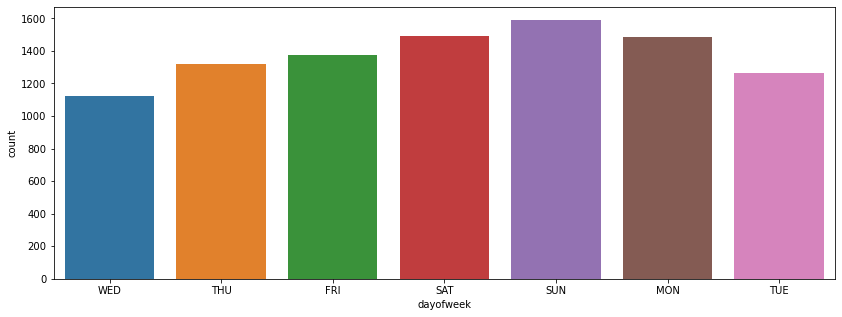

In [39]:
plt.figure(figsize=(14,5))
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["dayofweek"])

plt.show()

Comparitively frauds are happening more in saturday, sunday and monday

In [40]:
pd.crosstab(df["month"],df["is_fraud"])

is_fraud,0,1
month,,
APR,134292,678
AUG,175321,797
DEC,279748,850
FEB,96804,853
JAN,103878,849
JUL,171792,652
JUN,173048,821
MAR,142851,938
MAY,145940,935


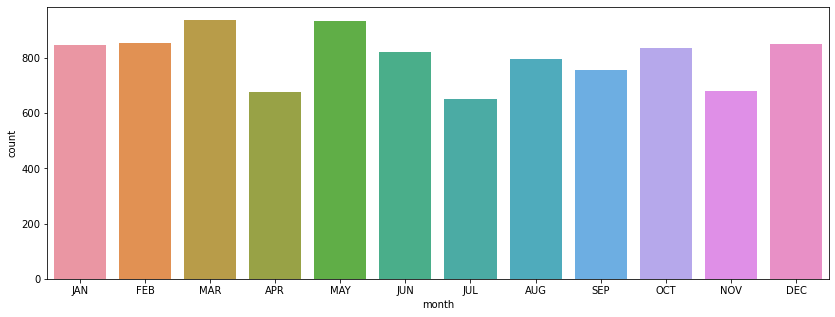

In [41]:
plt.figure(figsize=(14,5))
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["month"])
plt.show()

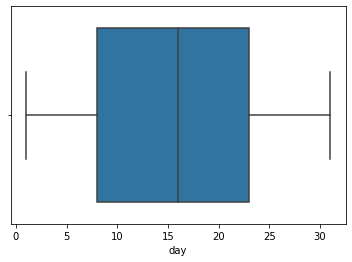

In [42]:
fraud=df[df['is_fraud']==1]
sns.boxplot(fraud['day'])
plt.show()

In [43]:
df.loc[(df['city_pop'] < 10000), ['pop_dense']] = "Less Dense"
df.loc[((df['city_pop'] > 10000) & (df['city_pop'] < 50000)), 
       ["pop_dense"]] = "Moderate Dense"
df.loc[(df['city_pop'] > 50000), ['pop_dense']] = "More Dense"

df = df.drop("city_pop", axis = 1)
df.pop_dense.value_counts(normalize = True)          
'''we can work with cities through their population parameter, as names of citiescannot implement whether a fraud will be done or not, while
population of a city can.'''

'we can work with cities through their population parameter, as names of citiescannot implement whether a fraud will be done or not, while\npopulation of a city can.'

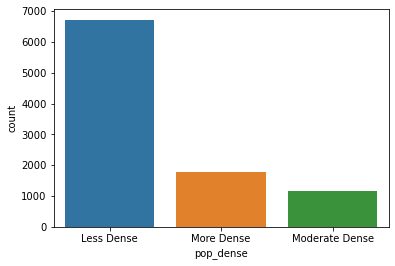

In [44]:
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["pop_dense"])
plt.show()

Frauds are happening more in less dense areas.

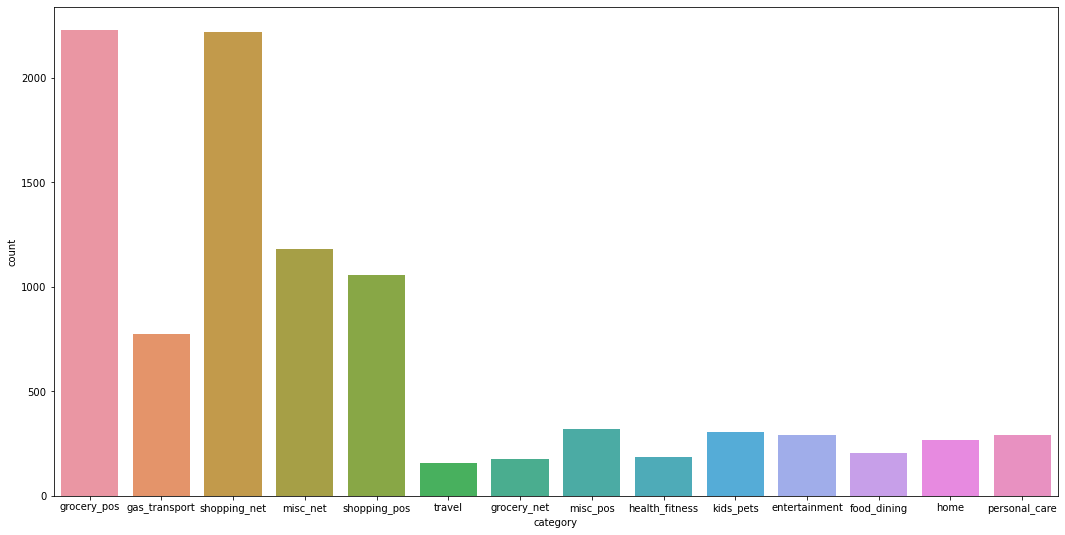

In [45]:
plt.figure(figsize=(18,9))
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["category"])
plt.show()

Fraudulent transactions are more for purchases in grocery and shopping stores.

In [46]:
df["job"].nunique()

497

In [47]:
fraud["job"].value_counts()

Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Corporate investment banker               4
Pension scheme manager                    4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: job, Length: 494, dtype: int64

In [48]:

''' sometimes distance from the customer's home location to the merchant's 
location can prove out to be main reason for fraud, so taking the 
#difference of longitude and lattitude of respective columns'''

df["lat_diff"] = abs(df["lat"] - df["merch_lat"])                           #1 degree = 110 kms
df["long_diff"] = abs(df["long"] - df["merch_long"]) 

''' it will be difficult to calculate distance between merchant's location
 or customer's location so applying pythogoras theorem'''   

df['displacement'] = np.sqrt(pow((df['lat_diff']*110),2) + pow((df['long_diff']*110),2))
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,limit,year,hour,month,dayofweek,day,pop_dense,lat_diff,long_diff,displacement
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,10904.141250,2019,0,JAN,TUE,1,Less Dense,0.067507,0.870215,96.011245
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,10192.197083,2019,0,JAN,TUE,1,Less Dense,0.271247,0.024038,29.954105
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,2141.430833,2019,0,JAN,TUE,1,Less Dense,0.969904,0.107519,107.342986
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,2479.454167,2019,0,JAN,TUE,1,Less Dense,0.803731,0.447271,101.178169
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,11607.784583,2019,0,JAN,TUE,1,Less Dense,0.254299,0.830441,95.535506


In [ ]:
# Now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
# df = df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [49]:
np.round(df["displacement"].describe(),2)

count    1852394.00
mean          84.22
std           31.32
min            0.03
25%           62.13
50%           87.81
75%          107.51
max          155.47
Name: displacement, dtype: float64

In [50]:
df.loc[(df['displacement'] < 50), ['location']] = "Closeby"
df.loc[((df['displacement'] >= 50) & (df['displacement'] <= 100)),['location']] = "Far"
df.loc[(df['displacement'] > 100), ['location']] = "Very Far"
df.location.value_counts(normalize = True)

Far         0.486722
Very Far    0.351177
Closeby     0.162102
Name: location, dtype: float64

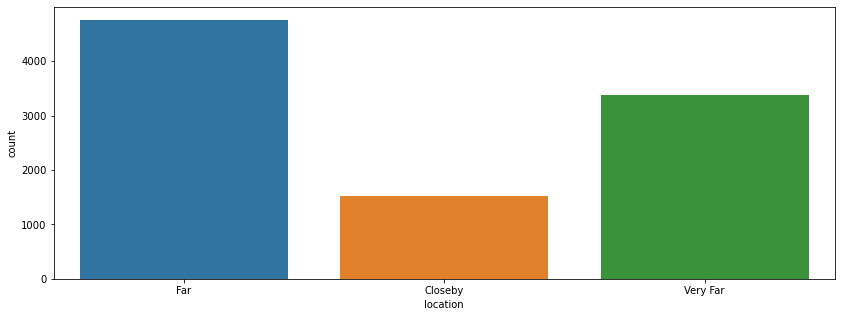

In [51]:
plt.figure(figsize=(14,5))
fraud=df[df['is_fraud']==1]
sns.countplot(fraud["location"])
plt.show()

In [52]:
# checking cc_num columns

df.cc_num.value_counts()

6538441737335434    4392
30270432095985      4392
6538891242532018    4386
4364010865167176    4386
4642255475285942    4386
                    ... 
4225628813173670       7
340187018810220        7
6011732631674654       7
4734310647841293       7
4295296907373          6
Name: cc_num, Length: 999, dtype: int64

In [53]:
fraud['cc_num'].value_counts()


3520550088202337       19
4599285557366057       19
4593569795412          19
4260128500325          18
6538441737335434       18
                       ..
4514242065619750        2
4089096483689733451     2
4503101193493052864     2
6011893664860915        2
3518234918950662        2
Name: cc_num, Length: 976, dtype: int64

In [54]:
df["recency"] = df.groupby(by="cc_num")["unix_time"].diff()

In [55]:
df['cc_num'].nunique()

999

In [56]:
df.loc[df.recency.isnull(),["recency"]] = -1

In [57]:
df.isnull().sum() #Checking out null values

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
age_group                0
limit                    0
year                     0
hour                     0
month                    0
dayofweek                0
day                      0
pop_dense                0
lat_diff                 0
long_diff                0
displacement             0
location                 0
recency                  0
dtype: int64

In [58]:
df["recency"].head()

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: recency, dtype: float64

In [59]:
# dividing recency to segments based on number of hours passed
df.recency = df.recency.apply(lambda x: float((x/60)/60))
df.loc[(df["recency"]<1),["recency_segment"]] = "Recent_Transaction"
df.loc[((df["recency"]>1) & (df["recency"]<6)),["recency_segment"]] = "Within 6 hours"
df.loc[((df["recency"]>6) & (df["recency"]<12)),["recency_segment"]] = "After 6 hours"
df.loc[((df["recency"]>12) & (df["recency"]<24)),["recency_segment"]] = "After Half-Day"
df.loc[(df["recency"]>24),["recency_segment"]] = "After 24 hours"
df.loc[(df["recency"]<0),["recency_segment"]] = "First Transaction"
df.recency_segment.value_counts(normalize = True)

Within 6 hours        0.419884
After 6 hours         0.188908
Recent_Transaction    0.171574
After Half-Day        0.142416
After 24 hours        0.076679
First Transaction     0.000539
Name: recency_segment, dtype: float64

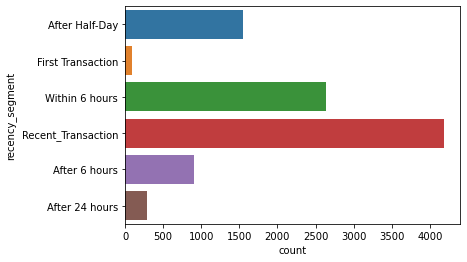

In [60]:
# checking fraud transactions based on recency
fraud = df[df["is_fraud"]==1]
sns.countplot(y=fraud.recency_segment)
plt.show()

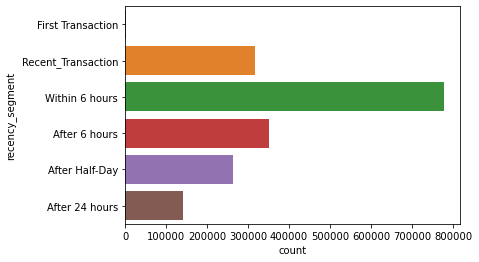

In [61]:

sns.countplot(y=df.recency_segment)
plt.show()

**Bi-Variate Analysis**

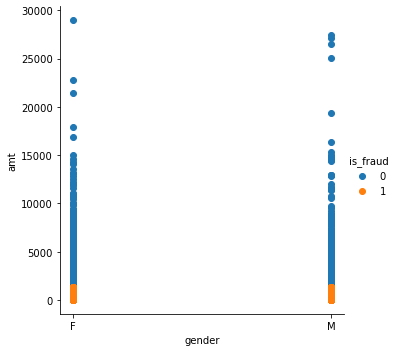

In [62]:
sns.FacetGrid(df,hue="is_fraud",size=5).map(plt.scatter,"gender","amt").add_legend();
plt.show()

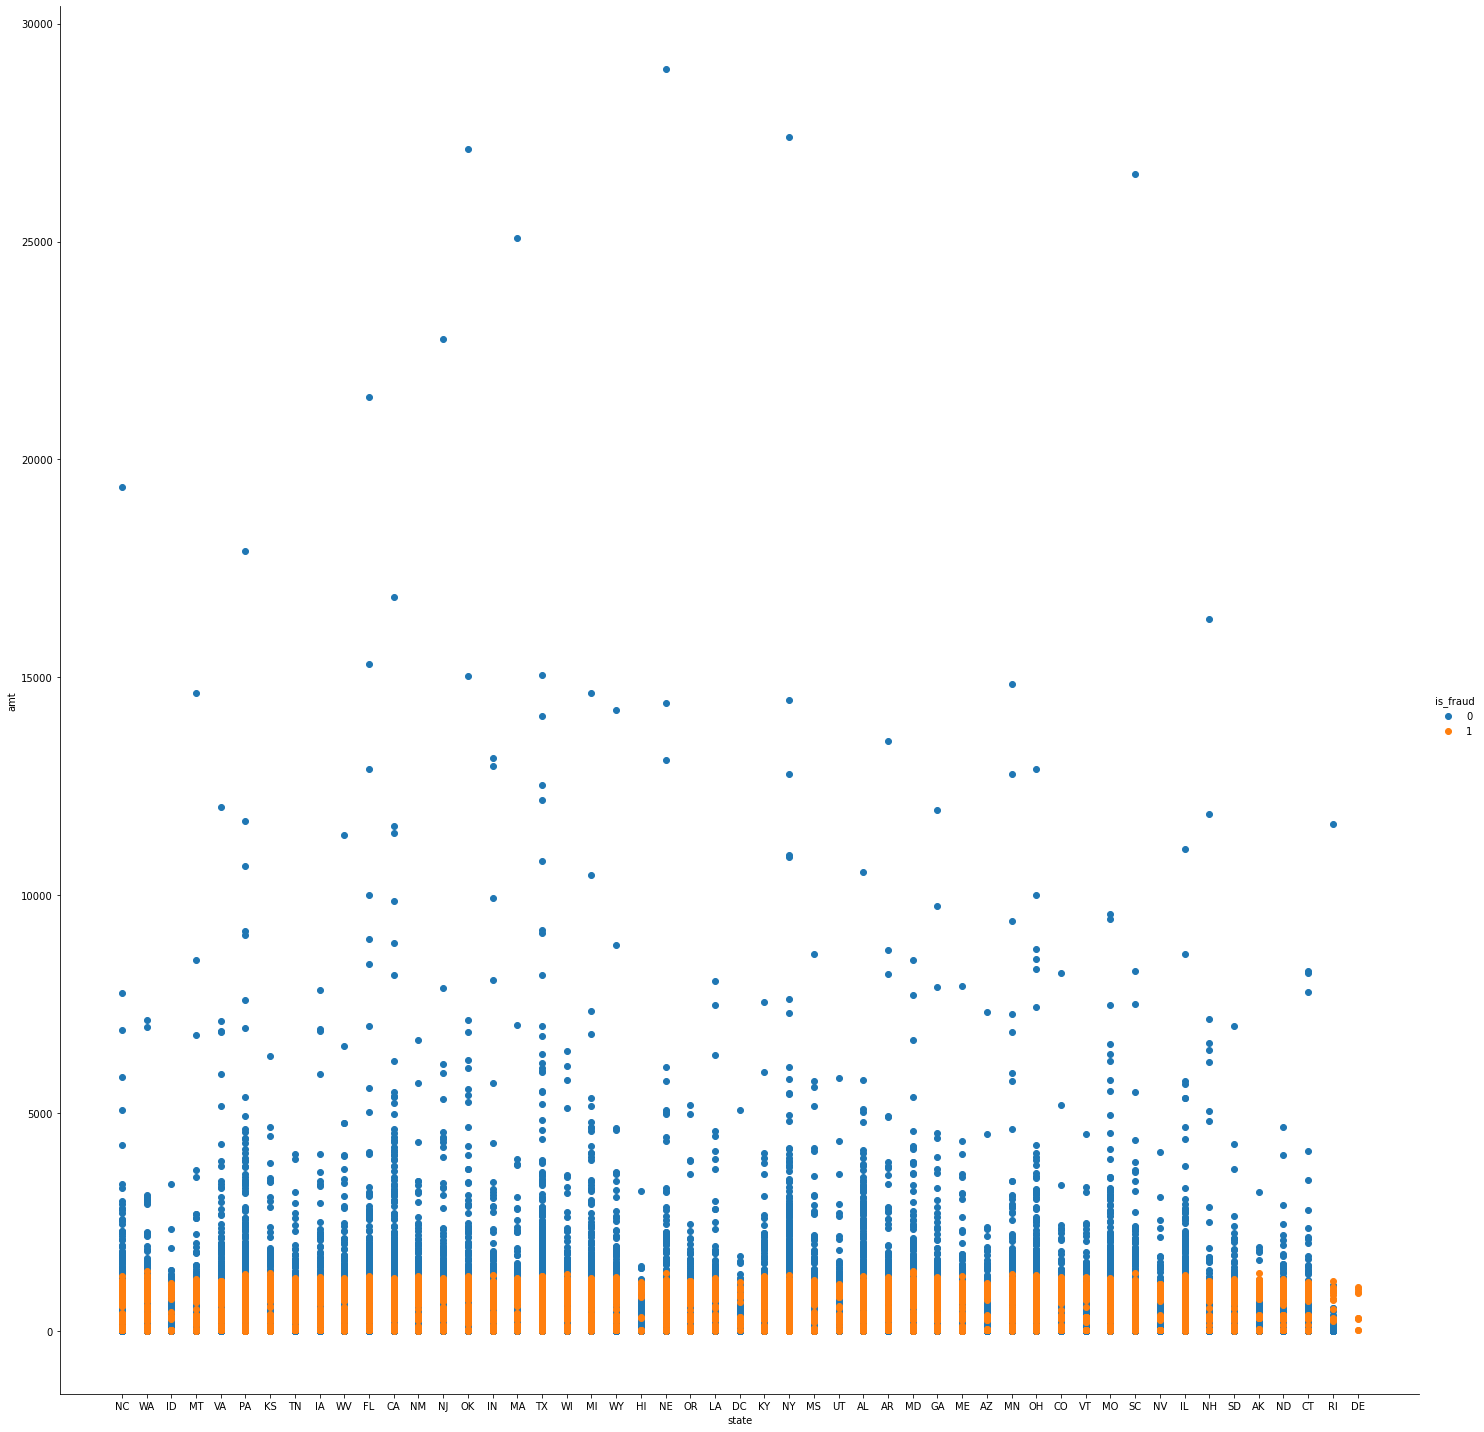

In [63]:
sns.FacetGrid(df,hue="is_fraud",size=20).map(plt.scatter,"state","amt").add_legend();
plt.show()

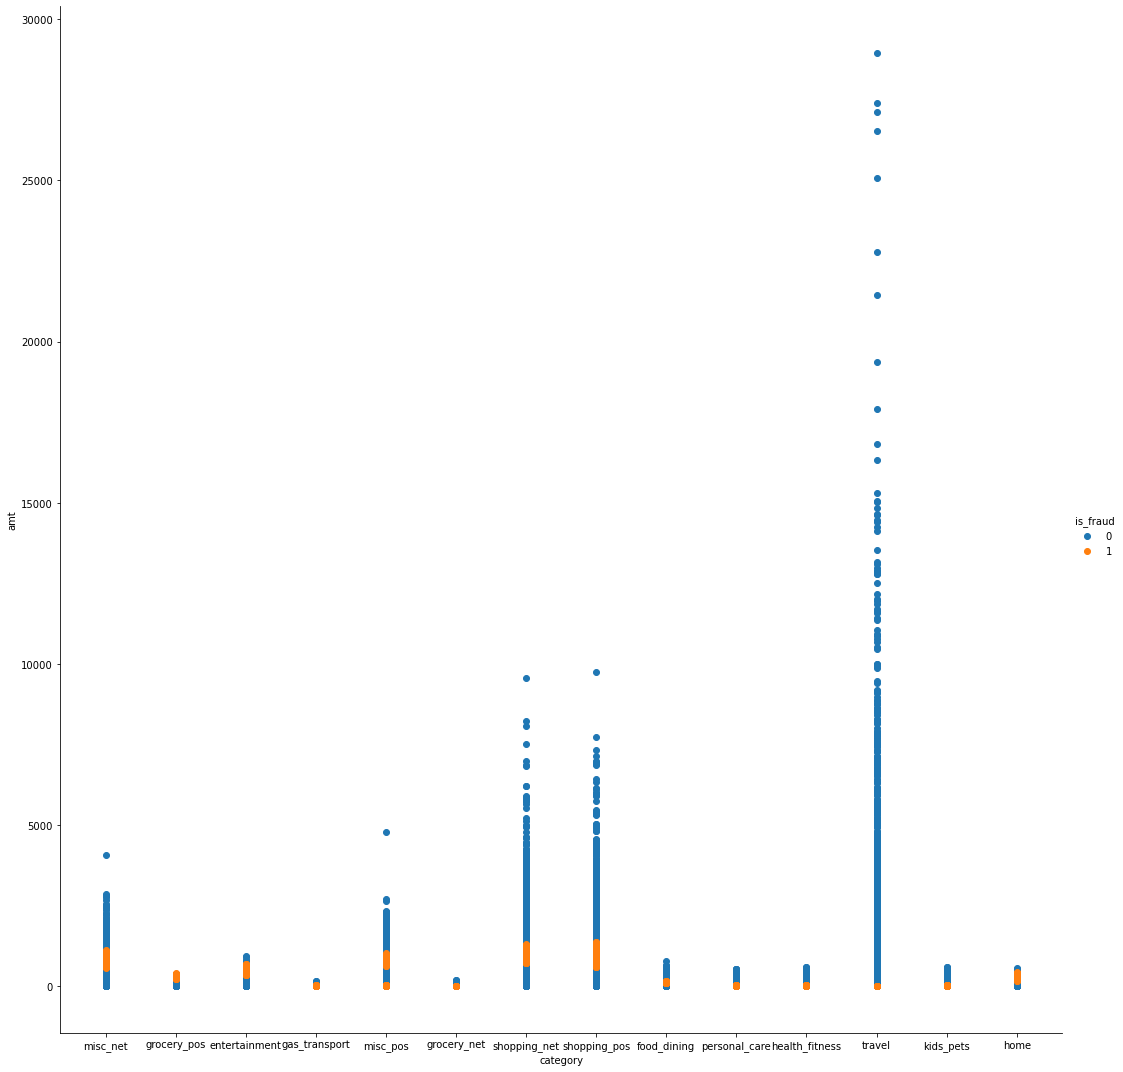

In [64]:
sns.FacetGrid(df,hue="is_fraud",size=15).map(plt.scatter,"category","amt").add_legend();
plt.show()

**Multi-Variate Analysis**

In [ ]:
sns.pairplot(df,hue="is_fraud",size=5)

# **TESTING OF** **HYPOTHESIS**

In [ ]:
#T TEST:
# Null hypothesis(H0):The average amount of fraudulent transaction is $400
# Alternative hypothesis(H1):The average amount of fraudulent transaction is not $400

In [ ]:
amt_mean = np.mean(fraud["amt"])
print("Mean is: ",amt_mean)
tset, pval = ttest_1samp(fraud["amt"], 400)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Null Hypothesis is rejected.The average amount of fraudulent transaction is not $400")
else:
  print("Null Hypothesis is accepted.The average amount of fraudulent transaction is $400")

In [ ]:
#CHI-SQUARE:
#  Null Hypothesis(H0): There is no significant relationship between the fraudulent transactions of state and population.
#  Alternative hypothesis(H1): There is a significant relationship between the fraudulent transactions of state and population.

In [ ]:
contingency_table=pd.crosstab(fraud["state"],fraud["pop_dense"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Null Hypothesis is rejected,There is a significant relationship between the fraudulent transactions of state and population")
else:
    print("Null Hypothesis is accepted,There is no significant relationship between the fraudulent transactions of state and population")
    
if p_value<=alpha:
    print("Null Hypothesis is rejected,There is a significant relationship between the fraudulent transactions of state and population")
else:
    print("Null Hypothesis is accepted,There is no significant relationship between the fraudulent transactions of state and population")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  job                    object 
 15  dob                    object 
 16  trans_num              object 
 17  unix_time              int64  
 18  merch_lat              float64
 19  merch_long             float64
 20  is_fraud               int64  
 21  age                    int64  
 22  age_group         

In [67]:
df1 = df.copy()

**MODEL BUILDING**

In [68]:
df1.drop(['trans_date_trans_time','first','last','street','city','zip','lat','long','dob','trans_num','location','unix_time','merch_lat','merch_long','lat_diff','long_diff'],axis=1,inplace=True)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cc_num           int64  
 1   merchant         object 
 2   category         object 
 3   amt              float64
 4   gender           object 
 5   state            object 
 6   job              object 
 7   is_fraud         int64  
 8   age              int64  
 9   age_group        object 
 10  limit            float64
 11  year             object 
 12  hour             int64  
 13  month            object 
 14  dayofweek        object 
 15  day              int64  
 16  pop_dense        object 
 17  displacement     float64
 18  recency          float64
 19  recency_segment  object 
dtypes: float64(4), int64(5), object(11)
memory usage: 296.8+ MB


<AxesSubplot:>

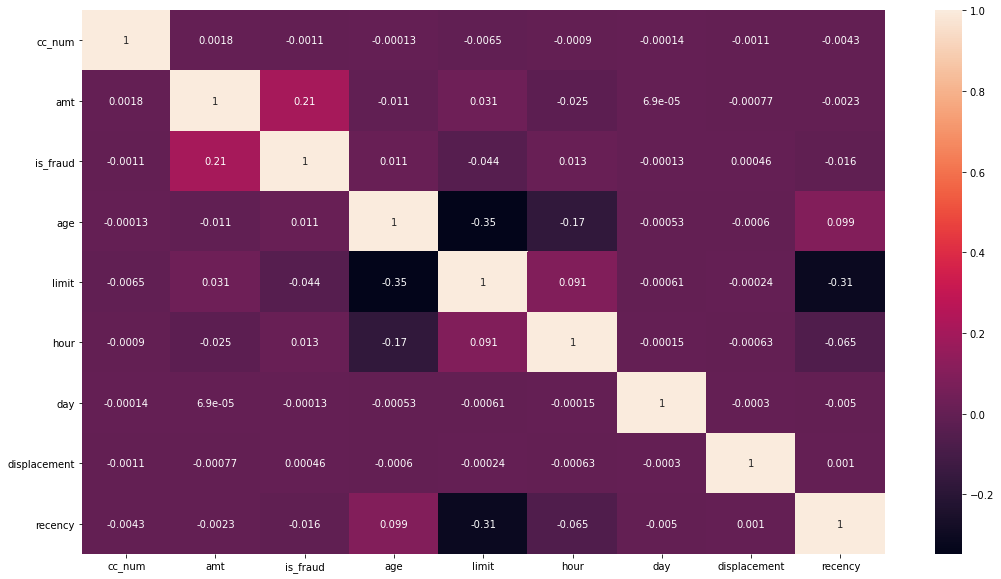

In [70]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)


In [71]:
df1.drop(['state','job','year','day','recency','merchant','age_group'],axis=1,inplace=True)

In [ ]:
#converting categorical variables to numerical
#ordinalEncoding

In [72]:
df1['gender'] = df1['gender'].replace(('M', 'F'), (0,1))

In [73]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype = np.float64)
enc.fit(df1.loc[:, ['category', 'dayofweek', 'pop_dense','month','recency_segment']])
df1.loc[:, ['category', 'dayofweek', 'pop_dense','month','recency_segment']] = enc.transform(df1[['category', 'dayofweek','pop_dense','month','recency_segment']])

In [74]:
df1['recency_segment'].value_counts()

5.0    777738
1.0    349908
4.0    317801
2.0    263792
0.0    142031
3.0       999
Name: recency_segment, dtype: int64

In [75]:
df1.loc[df1.recency_segment.isnull(),["recency_segment"]] = -1

In [76]:
df1.isnull().sum()

cc_num             0
category           0
amt                0
gender             0
is_fraud           0
age                0
limit              0
hour               0
month              0
dayofweek          0
pop_dense          0
displacement       0
recency_segment    0
dtype: int64

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cc_num           int64  
 1   category         float64
 2   amt              float64
 3   gender           int64  
 4   is_fraud         int64  
 5   age              int64  
 6   limit            float64
 7   hour             int64  
 8   month            float64
 9   dayofweek        float64
 10  pop_dense        float64
 11  displacement     float64
 12  recency_segment  float64
dtypes: float64(8), int64(5)
memory usage: 197.9 MB


In [78]:
# import libraries needed for this step
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix

import sklearn.neighbors
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from xgboost import XGBClassifier
import statsmodels.api as sm # estimates statistical models
from sklearn.feature_selection import RFE #Recursive Feature Elimination for feature selection
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
x = df1.drop(['is_fraud'],axis=1) 
y = df1['is_fraud'] 

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=42)

In [82]:
df1.isnull().sum() #Checking out null values

cc_num             0
category           0
amt                0
gender             0
is_fraud           0
age                0
limit              0
hour               0
month              0
dayofweek          0
pop_dense          0
displacement       0
recency_segment    0
dtype: int64

Before SMOTE

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)
y_lrpred=model1.predict(x_test)
y_lrpred

print("Logistic Regression")
print("Accuracy:", {accuracy_score(y_test,y_lrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_lrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_lrpred)})
print("F1-score equals:", {f1_score(y_test,y_lrpred).round(4)})
confusion_matrix(y_test,y_lrpred)

Logistic Regression
Accuracy: {0.9948}
recall_Score: {0.0}
Precision_score: {0.0}
F1-score equals: {0.0}


array([[737109,      0],
       [  3849,      0]], dtype=int64)

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
model2=dtr.fit(x_train,y_train)
y_dtrpred=model2.predict(x_test)
y_dtrpred

print("Decision tree")
print("Accuracy:", {accuracy_score(y_test,y_dtrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_dtrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_dtrpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_dtrpred).round(4)})
confusion_matrix(y_test,y_dtrpred)

Decision tree
Accuracy: {0.998}
recall_Score: {0.8239}
Precision_score: {0.8008}
F1-score equals: {0.8121}


array([[736320,    789],
       [   678,   3171]], dtype=int64)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model3=rf.fit(x_train,y_train)
y_rfpred=model3.predict(x_test)
y_rfpred

print("Random Forest")
print("Accuracy:", {accuracy_score(y_test,y_rfpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_rfpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_rfpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_rfpred).round(4)})
confusion_matrix(y_test,y_rfpred)

Xgboost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model4=xgb.fit(x_train,y_train)
y_xgbpred=model4.predict(x_test)
y_xgbpred

print("XGBoost")
print("Accuracy:", {accuracy_score(y_test,y_xgbpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_xgbpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_xgbpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_xgbpred).round(4)})
confusion_matrix(y_test,y_xgbpred)

KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
model5=knn.fit(x_train,y_train)
y_knnpred=model5.predict(x_test)
y_knnpred

print("KNN")
print("Accuracy:", {accuracy_score(y_test,y_knnpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_knnpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_knnpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_knnpred).round(4)})
confusion_matrix(y_test,y_knnpred)

KNN
Accuracy: {0.9952}
recall_Score: {0.1541}
Precision_score: {0.6911}
F1-score equals: {0.252}


array([[736844,    265],
       [  3256,    593]], dtype=int64)

NaiveBaiyes

In [87]:
from sklearn.naive_bayes import GaussianNB
gub=GaussianNB()
model6=gub.fit(x_train,y_train)
y_gubpred=model6.predict(x_test)
y_gubpred

print("Naive Baiyes")
print("Accuracy:", {accuracy_score(y_test,y_gubpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_gubpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_gubpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_gubpred).round(4)})
confusion_matrix(y_test,y_gubpred)

Naive Baiyes
Accuracy: {0.9948}
recall_Score: {0.0}
Precision_score: {0.0}
F1-score equals: {0.0}


array([[737109,      0],
       [  3849,      0]], dtype=int64)

SMOTE

In [88]:
smote = SMOTE()
x_train_new, y_train_new = smote.fit_resample(x_train, y_train.ravel())

In [89]:
x_train_new.shape

(2211268, 12)

In [90]:
y_train_new.shape

(2211268,)

AFTER SMOTE

Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train_new,y_train_new)
y_lrpred=model1.predict(x_test)
y_lrpred

print("Logistic Regression")
print("Accuracy:", {accuracy_score(y_test,y_lrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_lrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_lrpred)})
print("F1-score equals:", {f1_score(y_test,y_lrpred).round(4)})
confusion_matrix(y_test,y_lrpred)

Logistic Regression
Accuracy: {0.9948}
recall_Score: {0.0}
Precision_score: {0.0}
F1-score equals: {0.0}


array([[737109,      0],
       [  3849,      0]], dtype=int64)

In [92]:
confusion_matrix(y_test,y_lrpred)

array([[737109,      0],
       [  3849,      0]], dtype=int64)

Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
model2=dtr.fit(x_train_new,y_train_new)
y_dtrpred=model2.predict(x_test)
y_dtrpred
confusion_matrix(y_test,y_dtrpred)
print("Decision tree")
print("Accuracy:", {accuracy_score(y_test,y_dtrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_dtrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_dtrpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_dtrpred).round(4)})

Decision tree
Accuracy: {0.9956}
recall_Score: {0.7633}
Precision_score: {0.5576}
F1-score equals: {0.6444}


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model3=rf.fit(x_train_new,y_train_new)
y_rfpred=model3.predict(x_test)
y_rfpred
confusion_matrix(y_test,y_rfpred)
print("Random Forest")
print("Accuracy:", {accuracy_score(y_test,y_rfpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_rfpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_rfpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_rfpred).round(4)})

Hyper Parameter Tuning

In [94]:
dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

In [95]:
dtc2 = DecisionTreeClassifier(min_samples_split= 50, min_samples_leaf= 20, max_depth= 50, criterion= 'gini')
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=20, min_samples_split=50)

In [96]:

y_pred=dtc2.predict(x_test)


print("Accuracy score " , accuracy_score(y_test,y_pred))
print("Precision score " , precision_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Accuracy score  0.9986099077140674
Precision score  0.9183734045710893
F1 score:  99.86 %


In [97]:
dtc2 = DecisionTreeClassifier(min_samples_split= 5, min_samples_leaf= 5, max_depth= 5, criterion= 'gini')
dtc2.fit(x_train_new,y_train_new)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [98]:

y_pred=dtc2.predict(x_test)


print("Accuracy score " , accuracy_score(y_test,y_pred))
print("Precision score " , precision_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Accuracy score  0.9757692068916187
Precision score  0.1446566231672293
F1 score:  98.38 %


In [ ]:
dtc3 = DecisionTreeClassifier(min_samples_split= 50, min_samples_leaf= 20, max_depth= 50, criterion= 'gini')
dtc3.fit(x_train_new,y_train_new)

In [ ]:
y_pred=dtc3.predict(x_test)


print("Accuracy score " , accuracy_score(y_test,y_pred))
print("Precision score " , precision_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

In [ ]:
#xgboost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model4=xgb.fit(x_train_new,y_train_new)
y_xgbpred=model4.predict(x_test)
y_xgbpred

print("XGBoost")
print("Accuracy:", {accuracy_score(y_test,y_xgbpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_xgbpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_xgbpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_xgbpred).round(4)})
confusion_matrix(y_test,y_xgbpred)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
model5=knn.fit(x_train_new,y_train_new)
y_knnpred=model5.predict(x_test)
y_knnpred
confusion_matrix(y_test,y_knnpred)
print("KNN")
print("Accuracy:", {accuracy_score(y_test,y_knnpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_knnpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_knnpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_knnpred).round(4)})

NaiveBaiyes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gub=GaussianNB()
model6=gub.fit(x_train,y_train)
y_gubpred=model6.predict(x_test)
y_gubpred
confusion_matrix(y_test,y_gubpred)
print("Naive Baiyes")
print("Accuracy:", {accuracy_score(y_test,y_gubpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_gubpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_gubpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_gubpred).round(4)})

In [ ]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("Tree", DecisionTreeClassifier()))
#models.append(("RF", RandomForestClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("XGB", XGBClassifier()))
results = []
names = []
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV
for name,model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x,y,cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    cv1_results = cross_val_score(model, x,y,cv=kfold, scoring="precision")
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv1_results.mean()*100)
    print(outcome)

In [ ]:
fig = plt.figure()

sns.histplot(results)
plt.show()

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 2)
classifier.fit(x_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.80)
pca.fit(x_train)

In [ ]:
pca.n_components_

In [ ]:
x_train= pca.transform(x_train)
x_test= pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)
y_lrpred=model1.predict(x_test)
y_lrpred
confusion_matrix(y_test,y_lrpred)
print("Logistic Regression")
print("Accuracy:", {accuracy_score(y_test,y_lrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_lrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_lrpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_lrpred).round(4)})

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
model2=dtr.fit(x_train,y_train)
y_dtrpred=model2.predict(x_test)
y_dtrpred
confusion_matrix(y_test,y_dtrpred)
print("Decision tree")
print("Accuracy:", {accuracy_score(y_test,y_dtrpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_dtrpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_dtrpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_dtrpred).round(4)})

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model4=xgb.fit(x_train,y_train)
y_xgbpred=model4.predict(x_test)
y_xgbpred
confusion_matrix(y_test,y_xgbpred)
print("XGBoost")
print("Accuracy:", {accuracy_score(y_test,y_xgbpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_xgbpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_xgbpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_xgbpred).round(4)})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
model5=knn.fit(x_train,y_train)
y_knnpred=model5.predict(x_test)
y_knnpred
confusion_matrix(y_test,y_knnpred)
print("KNN")
print("Accuracy:", {accuracy_score(y_test,y_knnpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_knnpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_knnpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_knnpred).round(4)})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model3=rf.fit(x_train,y_train)
y_rfpred=model3.predict(x_test)
y_rfpred

print("Random Forest")
print("Accuracy:", {accuracy_score(y_test,y_rfpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_rfpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_rfpred).round(4)})
print("F1-score equals:", {f1_score(y_te

In [ ]:
from sklearn.naive_bayes import GaussianNB
gub=GaussianNB()
model6=gub.fit(x_train,y_train)
y_gubpred=model6.predict(x_test)
y_gubpred
confusion_matrix(y_test,y_gubpred)
print("Naive Baiyes")
print("Accuracy:", {accuracy_score(y_test,y_gubpred).round(4)})
print("recall_Score:", {recall_score(y_test,y_gubpred).round(4)})
print("Precision_score:", {precision_score(y_test,y_gubpred).round(4)})
print("F1-score equals:", {f1_score(y_test,y_gubpred).round(4)})

In [ ]:
#To get longitude and longitude from location
from geopy.geocoders import ArcGIS
nom=ArcGIS()
df3 = nom.geocode('JP Morgan Tower')

In [ ]:
df3[1][0]